In [2]:
#1) PCA 적용 전 각 특성의 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#####################################
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() #breast_cancer sample 데이터

scaler = StandardScaler()
scaler.fit(cancer.data)
X_Scaled = scaler.transform(cancer.data)



In [2]:
# 2) PCA 적용. 두 개의 주성분만 유지하는 데이터 변환 (차원축소)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_Scaled)

X_pca = pca.transform(X_Scaled)
print(X_Scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


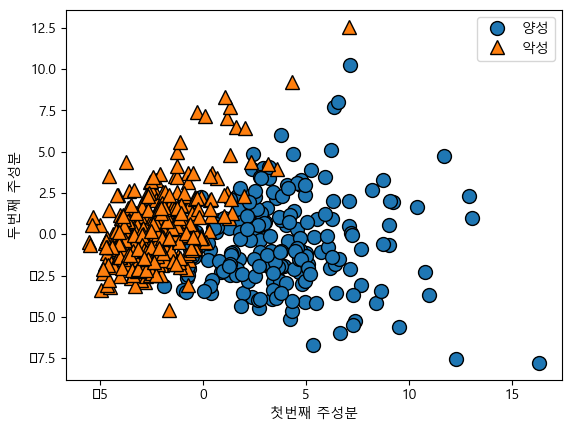

In [6]:
# 3) 산점도 그래프(첫, 두번째 주성분으로 산점도 그래프, cancer.target 0 악성, 1 양성데이터에 따라 다른 색표현
import mglearn
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["양성", "악성"], loc = "best")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


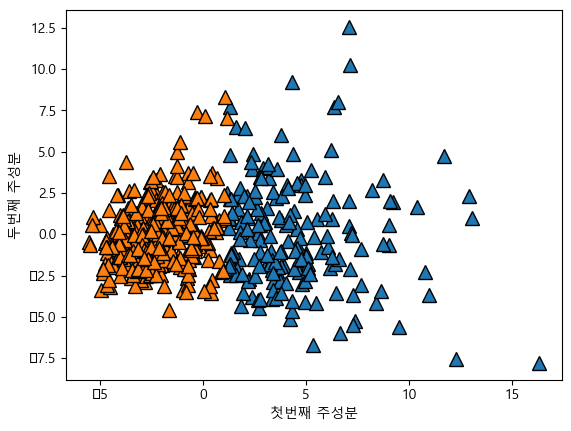

In [8]:
# 4) cancer.target 데이터를 활용하지 않고, 첫번째 두번째 주성분으로 군집화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_Scaled)

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], kmeans.labels_, markers = '^')
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()